# Prime numbers

**A natural number $p$ is said to be prime iff it is only divisible by himself and 1**. Prime numbers actually construct all the other numbers by multiplication, this is, if we are given the whole (infinitely) set of prime numbers we can construct all other natural numbers by multiplying different prime numbers.

In cryptography we work on very large prime numbers and this constitutes a problem a priori... How do we find large prime numbers? First let me show you how can we generate prime numbers up to N in a fast way

## Sieve of Eratosthenes

A simple way to generate prime numbers is using the sieve of Erastosthenes. In this algorithm we start generating a list of numbers from 2 to N and check for every number if it is divisible by the prime numbers we already have and mark it as prime if cannot be composed by lower primes. After this, if the number results prime we take out all the multiples of such number in the list.

For instance, imagine we want to generate all prime numbers smaller than N=20 at the beginning we find 2 as the first prime number since our prime number list is empty. We take 2 and find its multipliers, this is, 4, 6, 8, 10, 12, 14, 16, 18 and 20. We delete those as potential candidates for prime numbers (they can be composed multiplying 2 by other numbers). Then we check 3, it is not divisible by 2 (the only prime number in the list so far) so 3 must be prime. We delete from the potential candidates list, 6, 9, 12, 15, 18. We skip 4 because it was taken out previously so we get to test 5 and is not divisible by 3 nor 2 so it must be a prime. We take out 10, 15 and 20 from the list of potential candidates. We do that until we have no further candidates to check.

In [1]:
from crypt import primes_sieve_eratosthenes

N = 20
print(list(primes_sieve_eratosthenes(N)))

[2, 3, 5, 7, 11, 13, 17, 19]


## Euler totient

Euler's totient function counts the positive integers up to a given integer n that are relatively prime to n. It is written using the Greek letter phi as φ(n) or ϕ(n), and may also be called Euler's phi function. In other words, it is the number of integers k in the range 1 ≤ k ≤ n for which the greatest common divisor gcd(n, k) is equal to 1. Go to  [Wikipedia](https://en.wikipedia.org/wiki/Euler%27s_totient_function) for more details.

In [14]:
from crypt import EulerTotient

N = 1000

totatives = []
for i in range(N):
    totatives.append(EulerTotient(i))

index = list(range(N))

for a, b in zip(index[0:20], totatives[0:20]):
    print("i = {}, totatives={}".format(a, b))

i = 0, totatives=0
i = 1, totatives=1
i = 2, totatives=1
i = 3, totatives=2
i = 4, totatives=2
i = 5, totatives=4
i = 6, totatives=2
i = 7, totatives=6
i = 8, totatives=4
i = 9, totatives=6
i = 10, totatives=4
i = 11, totatives=10
i = 12, totatives=4
i = 13, totatives=12
i = 14, totatives=6
i = 15, totatives=8
i = 16, totatives=8
i = 17, totatives=16
i = 18, totatives=6
i = 19, totatives=18


First we must nottice someting, the phi function is not increasing as the number $i$ does. Second and most important, it makes the big jump when $i$ is ia prime number. It is easy to demonstrate that $gcd(p, k)$ is 1 for all $k$ smaller than $p$. Therefore the Euler totient for a prime number $p$ is $p-1$. Let's generate for prime numbers only:

In [13]:
primes = list(primes_sieve_eratosthenes(N))

totatives_prime = []
for i in primes:
    totatives_prime.append(EulerTotient(i))

for a, b in zip(primes[0:20], totatives_prime[0:20]):
    print("i = {}, totatives={}".format(a, b))

i = 2, totatives=1
i = 3, totatives=2
i = 5, totatives=4
i = 7, totatives=6
i = 11, totatives=10
i = 13, totatives=12
i = 17, totatives=16
i = 19, totatives=18
i = 23, totatives=22
i = 29, totatives=28
i = 31, totatives=30
i = 37, totatives=36
i = 41, totatives=40
i = 43, totatives=42
i = 47, totatives=46
i = 53, totatives=52
i = 59, totatives=58
i = 61, totatives=60
i = 67, totatives=66
i = 71, totatives=70


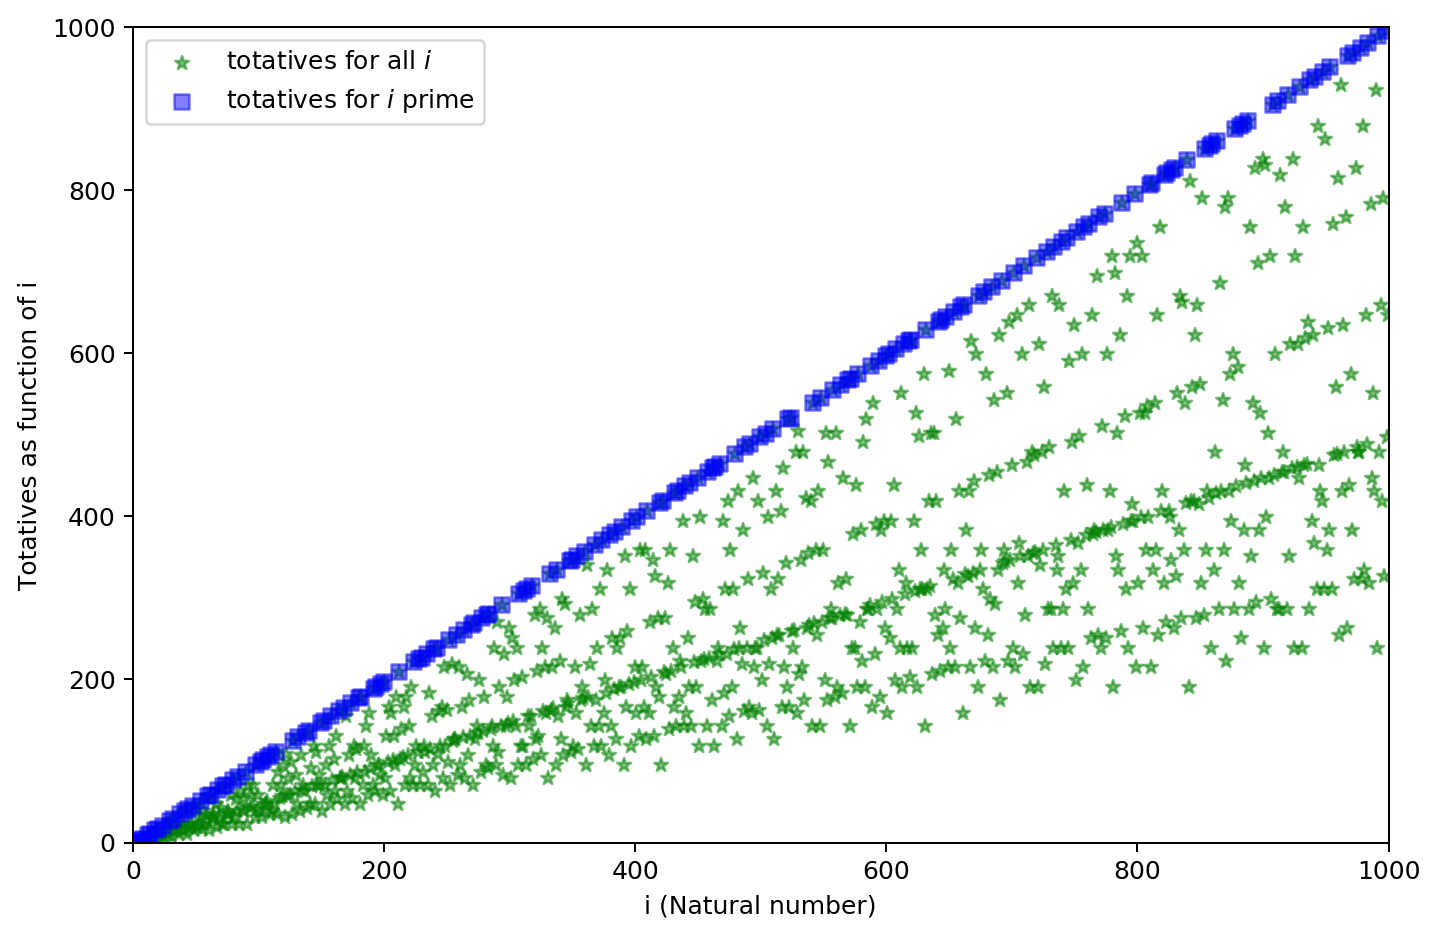

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(index, totatives, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="totatives for all $i$")

plt.scatter(primes, totatives_prime, c="b", alpha=0.5, marker='s',
            label="totatives for $i$ prime")

plt.xlabel("i (Natural number)")
plt.ylabel("Totatives as function of i")
plt.legend(loc='upper left')
plt.ylim((0, N))
plt.xlim((0, N))
plt.show()

## Prime number density

For now we've seen how to generate prime numbers up to N but what if we just want to know the number of primes that we have between two numbers? That's going to be super useful when dealing with cryptography applications, why? Because we want large prime number density in order to avoid someone guessing randomly our secredly selected prime number. Let $\pi(X)$ be the function that counts the number of primes up to number $X$, then

$$lim_{X \rightarrow \infty} \frac{\pi(X)}{X/ln(X)} = 1$$

For instance, how many primes we expect between 10^5 and 10^6?

In [27]:
from numpy import log

def expectedPrimes(X):
    return X/log(X)

n2 = 1000000
n1 = 100000

print("Expected number of primes between {} and {} is {}".format(n1, n2, expectedPrimes(n2)-expectedPrimes(n1)))

Expected number of primes between 100000 and 1000000 is 63696.52401247693


In [28]:
all_primes = list(primes_sieve_eratosthenes(n2))

primes_btween = []
for prime in all_primes:
    if (prime < n2) and (prime > n1):
        primes_btween.append(prime)
        
print("Number of primes between {} and {} is {}".format(n1, n2, len(primes_btween)))

Number of primes between 100000 and 1000000 is 68906


According to this, the probability of a random number $N$ of being prime is $$1/ln(N)$$.

You can find more details of the prime number density [here](https://en.wikipedia.org/wiki/Prime_number_theorem) or in [this](https://www.springer.com/gp/book/9781441926746) book.

## Primality testing

In many aplications in cryptography we need to generate very large prime numbers, of the order of $10^{1024}$. Obviously we can't use the sieve of Eratosthenes to generate all prime numbers up to this number and then pick one. Instead what one does is test if a random number is prime. 

How can we check if a number is prime?. Seems to be an easy task if we think of the Fermat's little theorem: Let $p$ be a prime number, then

$$a^p=a (mod p)$$

What this condition says is that no matter what, if $p$ is prime this is true. However it may also be true for some other numers, for instance 561. These numbers are called Carmichael numbers. Let's check the powers for this Carmichael number

In [31]:
from crypt import fastPowering

c = 561

# this code will print if a is not equal to a^p (mod p)
for a in range(c):   
    if a != fastPowering(a, c, c):
        print("Condition not acoomplished... a = {} and a^p = {}".format(a, fastPowering(a,c,c)))

Ok, so the number 561 preserves the condition $a^p=a (mod p)$ but is it prime? lets find prime numbers up to N = 600

In [39]:
print(list(primes_sieve_eratosthenes(600)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599]


As you can see 561 is NOT a prime number. Therefore we cannot use the Fermat's little theorem to do primality test. However, there are other methods, for instance the Miller-Rabin algorithm. I won't describe it here (you can finde a nice explanation on [this](https://www.springer.com/gp/book/9781441926746) book page 124) but the main claim is that if the algorithm finds that a number is composite then it is for sure composite, however if it finds is prime there is a slight chance that the number is not prime. Let's use this primality test

In [74]:
from crypt import isPrime
from random import randrange
n = 467
print("is {} prime? {}".format(n, isPrime(n, 20)))

n = randrange(0, 99999999)
print("is {} prime? {}".format(n, isPrime(n, 20)))

is 467 prime? True
is 5874211 prime? False


As you can see, this is very fast to run. We'll use it in the next section

## Random prime number generator

Using the Miller-Rabin algorithm we can find random large prime numbers in a fast way, we just need to loop on random generated numbers until we find a prime. The function is coded in my lib crypt.

In [76]:
from crypt import generateLargePrime

size = 128
tests = 40
large_prime = generateLargePrime(size, tests)
print("A random generated prime number of size {} and number of tests {} is {}".format(size, tests, large_prime))

A random generated prime number of size 128 and number of tests 40 is 306551670466596521763443818822419025927
